### So how does Logistic Regression work? Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result

### `p = h_θ(x) = σ(xᵀθ)`


### How Logistic Regression Works?

1. Linear Combination First

- Just like Linear Regression, Logistic Regression starts by computing a linear combination of input features:
- `z = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ` # or in vector form: z = xᵀθ

- **Example:**
- Suppose we have: θ₀ = -3, θ₁ = 1, θ₂ = 1
- For input: x₁ = 4, x₂ = 3
- So, z = -3 + 1x4 + 1x3 = 4


2. Apply Sigmoid Function

- The linear output `z` is passed through a sigmoid function to get probabilities between 0 and 1
- `σ(z) = 1 / (1 + e^(-z))`


In [1]:
import numpy as np


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Continuing previous example: z = 4
probability = sigmoid(4)
print(f"Probability: {probability:.4f}")  # Output: 0.9820 (98.2% chance)

Probability: 0.9820


3. Probability Interpretation
   The output represents the probability that the instance belongs to class 1:

- `p = 0.8` means 80% chance of being class 1
- `p = 0.3` means 30% chance of being class 1 (or 70% chance of class 0)

**Decision Making**

Threshold Rule:
`if p ≥ 0.5: predict class 1`
`if p < 0.5: predict class 0`

Why 0.5? Because sigmoid(0) = 0.5


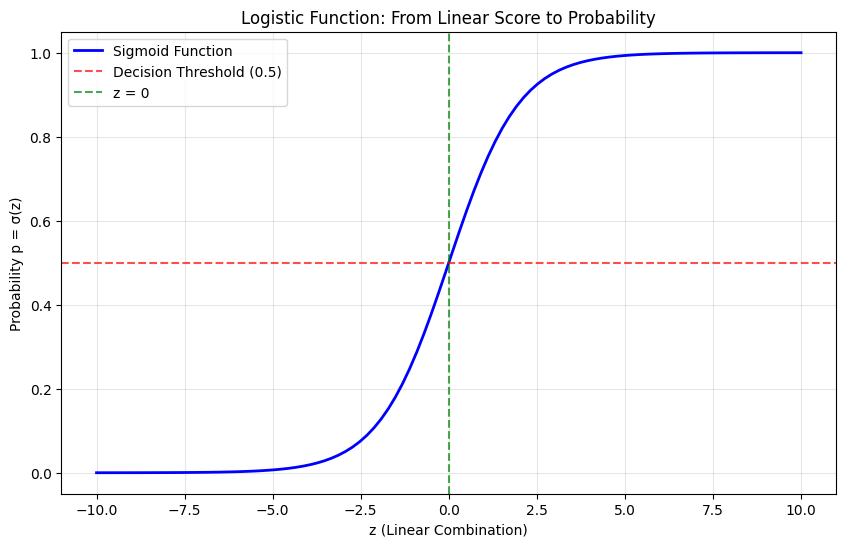

=== Probability Estimation Examples ===
z = -5 → p = 0.0067 → Predict class 0
z = -2 → p = 0.1192 → Predict class 0
z =  0 → p = 0.5000 → Predict class 1
z =  2 → p = 0.8808 → Predict class 1
z =  5 → p = 0.9933 → Predict class 1


In [2]:
import matplotlib.pyplot as plt

# Create sample data
z_values = np.linspace(-10, 10, 100)
probabilities = sigmoid(z_values)

# Plot the sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(z_values, probabilities, "b-", linewidth=2, label="Sigmoid Function")
plt.axhline(
    y=0.5, color="r", linestyle="--", alpha=0.7, label="Decision Threshold (0.5)"
)
plt.axvline(x=0, color="g", linestyle="--", alpha=0.7, label="z = 0")
plt.xlabel("z (Linear Combination)")
plt.ylabel("Probability p = σ(z)")
plt.title("Logistic Function: From Linear Score to Probability")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Practical example
print("=== Probability Estimation Examples ===")
examples = [-5, -2, 0, 2, 5]

for z in examples:
    p = sigmoid(z)
    prediction = 1 if p >= 0.5 else 0
    print(f"z = {z:2.0f} → p = {p:.4f} → Predict class {prediction}")

### Understanding Logits and Odds

**Logit (Log-Odds)**

- `logit(p) = log(p / (1 - p))` # This is the inverse of sigmoid

- Relationship:
  - If p = 0.9 → Odds = 0.9/0.1 = 9 → Log-odds = log(9) ≈ 2.2
  - If p = 0.1 → Odds = 0.1/0.9 = 0.111 → Log-odds = log(0.111) ≈ -2.2


In [3]:
def logit(p):
    return np.log(p / (1 - p))


# Test the inverse relationship
z = 2.0
p = sigmoid(z)
z_recovered = logit(p)

print(f"Original z: {z}")
print(f"Probability p: {p:.4f}")
print(f"Recovered z from p: {z_recovered:.4f}")

Original z: 2.0
Probability p: 0.8808
Recovered z from p: 2.0000


### Key Points Summary

**1. Two-Step Process:**

- Step 1: Compute linear combinations `z = xᵀθ`
- Step 2: Apply sigmoid `p = σ(z)` to get probability

**2. Decision Boundary:**

- Threshold at 0.5 corresponds to z = 0
- The decision boundary is where `xᵀθ = 0`

**3. Probability Range:**

- Always between 0 and 1
- Interpretable as confidence level

**4. Mathematical Properties:**

- Sigmoid converts any real number to (0, 1)
- Logit is the inverse operation
- z represents the "log-odds" of the positive class

**5. Practical Implication:**

- For a trained logistic regression model:
- High positive z → High probability → Confident class 1 prediction
- High negative z → Low probability → Confident class 0 prediction
- z near 0 → Uncertain prediction (p near 0.5)

This probability estimation is what makes Logistic Regression so useful - it doesn't just give a class label, but also tells you how confident it is about that prediction!
